In [2]:
import pandas as pd
import numpy as np

# Create sample data
np.random.seed(42)
dates = pd.date_range(start='2025-01-01', end='2025-06-30', freq='D')
data = {
    'order_id': np.arange(1, len(dates)+1),
    'product_category': np.random.choice(['Electronics','Furniture','Clothing','Grocery'], len(dates)),
    'region': np.random.choice(['North','South','East','West'], len(dates)),
    'sales_amount': np.random.randint(100, 5000, len(dates)),
    'profit': np.random.randint(20, 1000, len(dates)),
    'date': dates
}
df = pd.DataFrame(data)
df.to_csv('../data/retail_sales.csv', index=False)
df.head()

,order_id,product_category,region,sales_amount,profit,date
0,1,Clothing,East,4161,304,2025-01-01
1,2,Grocery,South,3469,993,2025-01-02
2,3,Electronics,East,362,239,2025-01-03
3,4,Clothing,North,723,88,2025-01-04
4,5,Clothing,North,1116,66,2025-01-05


In [3]:
df = pd.read_csv('../data/retail_sales.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          181 non-null    int64 
 1   product_category  181 non-null    object
 2   region            181 non-null    object
 3   sales_amount      181 non-null    int64 
 4   profit            181 non-null    int64 
 5   date              181 non-null    object
dtypes: int64(3), object(3)
memory usage: 8.6+ KB


,order_id,sales_amount,profit
count,181.000000,181.000000,181.000000
mean,91.000000,2628.801105,516.469613
std,52.394338,1457.172240,285.883884
min,1.000000,104.000000,31.000000
25%,46.000000,1250.000000,272.000000
50%,91.000000,2801.000000,518.000000
75%,136.000000,3891.000000,758.000000
max,181.000000,4993.000000,997.000000


In [4]:
# Total sales by region
sales_by_region = df.groupby('region')['sales_amount'].sum()

# Profit margin
df['profit_margin'] = df['profit'] / df['sales_amount'] * 100
profit_by_category = df.groupby('product_category')['profit_margin'].mean()

# Monthly sales trend
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
monthly_sales = df.groupby('month')['sales_amount'].sum()


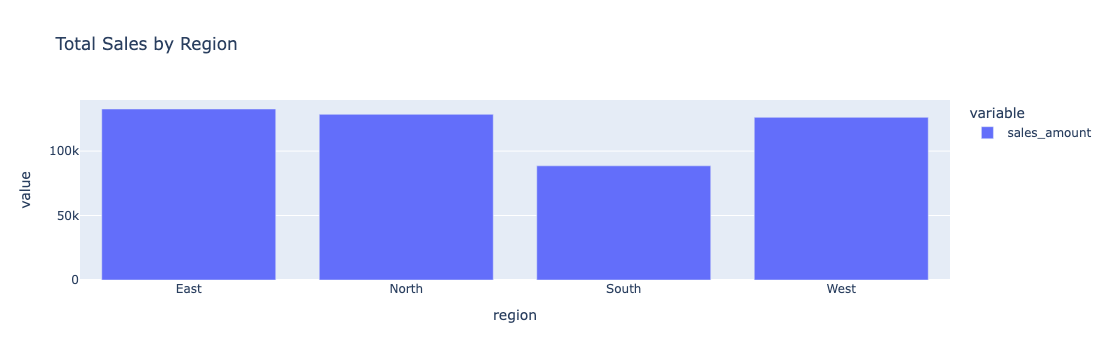

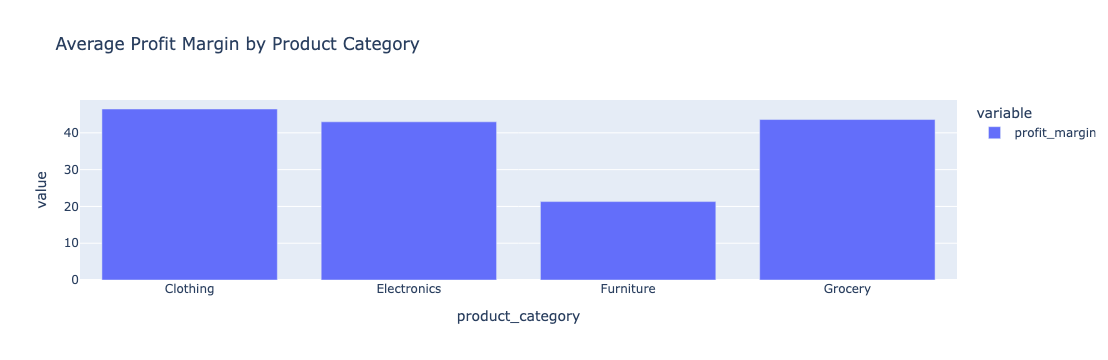

TypeError: Object of type Period is not JSON serializable

In [5]:
import plotly.express as px

px.bar(sales_by_region, title='Total Sales by Region').show()
px.bar(profit_by_category, title='Average Profit Margin by Product Category').show()
px.line(monthly_sales, title='Monthly Sales Trend').show()


In [1]:
print("✅ Kernel is working!")

✅ Kernel is working!
